# CAR PRICE PREDICTION - LINEAR REGRESSION 

# 1.Importing Libraries

In [1]:
import warnings                          # Supress display of warnings
warnings.filterwarnings('ignore')
import pandas as pd                      # Data manipulation and analysis
import numpy as np                       # mathematiical operations on large, multi-dimensional arrys and matrices
import matplotlib.pyplot as plt          # Data visualization library for 2D plots built in numpy arrays
import seaborn as sns                    # Provide interface for drawing statistical graphics
import datetime as dt                    # Perforn date operations

In [2]:
from sklearn.model_selection import GridSearchCV      # Used to search the best parameter to train the model
from sklearn.model_selection import train_test_split  # Split the data for training and Testing the model

#import metrics for tabulating the result
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score,mean_absolute_error
from statsmodels.tools.eval_measures import rmse

#Algorithm used for feature selection
from sklearn.ensemble import RandomForestRegressor

#Importing functions to perform regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import statsmodels.api as sm

from scipy.stats import shapiro           # Used for Scientific Computations

plt.rcParams['figure.figsize'] = [15,8]   #Set the plot size in inches

# 2.Importing Data

In [3]:
df = pd.read_csv('train.csv')

# 3.Understanding the Data

In [4]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [5]:
df.tail()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12


In [6]:
df.shape

(19237, 18)

In [7]:
y = df["Price"]
y.shape

(19237,)

In [8]:
# Drop Price column from the dataset
df = df.drop(['Price'], axis = 1)

In [9]:
df.shape

(19237, 17)

In [10]:
info = pd.DataFrame()     # Empty DataFrame

#data types and Unique values of data set
info['Data Type'] = df.dtypes
info['Unique Vales'] = df.nunique()
info

,Data Type,Unique Vales
ID,int64,18924
Levy,object,559
Manufacturer,object,65
Model,object,1590
Prod. year,int64,54
Category,object,11
Leather interior,object,2
Fuel type,object,7
Engine volume,object,107
Mileage,object,7687


In [11]:
df.describe()

,ID,Prod. year,Cylinders,Airbags
count,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,2010.912824,4.582991,6.582627
std,9.365914e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1939.000000,1.000000,0.000000
25%,4.569837e+07,2009.000000,4.000000,4.000000
50%,4.577231e+07,2012.000000,4.000000,6.000000
75%,4.580204e+07,2015.000000,4.000000,12.000000
max,4.581665e+07,2020.000000,16.000000,16.000000


In [12]:
df.describe(include = 'object')

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
count,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237
unique,559,65,1590,11,2,7,107,7687,4,3,3,2,16
top,-,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,5819,3769,1083,8736,13954,10150,3916,721,13514,12874,18332,17753,5033


# 4.Preprocessing the Data

Analyze and prepare data to perform regression analysis:

                    1. Check data types. Ensure your data types are correct. Refer data definitions to validate 
                    2. If data types are not as per business definition, change the data types as per requirement 
                    3. Study summary statistics
                    4. Distribution of variables
                    5. Study correlation
                    6. Detect outliers
                    7. Check for missing values
                    8. Do feature engineering to add meaning features to train the model

In [13]:
df["Mileage"]=df["Mileage"].str.split(" ",n=1,expand=True) #Separate out km

In [14]:
df["Mileage"]=df["Mileage"].astype("float")                #Converting string to float type

In [15]:
# Replace all '0' valus in Mileage with mean value 
#syntax of "np.where" is (condition,if true value,if false value)

df["Mileage"] = np.where(df["Mileage"]==0.0, df["Mileage"].mean(),df["Mileage"])

In [16]:
# Checking the unique values of 'Doors' column
df["Doors"].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [17]:
# Removing string literals from 'Doors' column
df["Doors"] = np.where((df["Doors"]=='04-May')| (df["Doors"]=='02-Mar'),df["Doors"].str.split("-").str[0],df["Doors"])
df["Doors"].unique()

array(['04', '02', '>5'], dtype=object)

In [18]:
#Checking the unique values of 'levy column'
df['Levy'].unique()

array(['1399', '1018', '-', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

In [19]:
#Replacing the '-' character with 0
df["Levy"]=pd.to_numeric(df['Levy'].replace('-','0'), downcast='float')

In [20]:
#Replacing the 0 value with mean
df["Levy"]=np.where(df["Levy"]=='0.0',df["Levy"].mean(),df["Levy"])

In [21]:
#Check Unique values of Engine Volume\
df["Engine volume"].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [22]:
# Removing all the string literals
df["Engine volume"]=pd.to_numeric(df["Engine volume"].str.split(" ").str[0], downcast="float")

In [23]:
# Replace 0 values with the mean value
df["Engine volume"]=np.where(df["Engine volume"]==0.0,df["Engine volume"].mean(),df["Engine volume"])

In [24]:
df.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04,Left wheel,Silver,12
1,44731507,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04,Left wheel,Black,8
2,45774419,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04,Right-hand drive,Black,2
3,45769185,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04,Left wheel,White,0
4,45809263,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04,Left wheel,Silver,4


Feature engineering is the process of deriving new features(indepedent variable) from the existing features(independent variable), that will help in training the model and in turn would improve the accuracy of the model or reduce the loss of the model.

In [25]:
#Feature engineering using the 'production year' column
current_time = dt.datetime.now()
df['Prod. year']=current_time.year-df['Prod. year']

In [26]:
df.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,1399.0,LEXUS,RX 450,12,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04,Left wheel,Silver,12
1,44731507,1018.0,CHEVROLET,Equinox,11,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04,Left wheel,Black,8
2,45774419,0.0,HONDA,FIT,16,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04,Right-hand drive,Black,2
3,45769185,862.0,FORD,Escape,11,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04,Left wheel,White,0
4,45809263,446.0,HONDA,FIT,8,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04,Left wheel,Silver,4


In [27]:
#Checkinh missing values in the Dataset
df.isnull().sum()

ID                  0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [28]:
# After Preprocessing Dataset
df.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,1399.0,LEXUS,RX 450,12,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04,Left wheel,Silver,12
1,44731507,1018.0,CHEVROLET,Equinox,11,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04,Left wheel,Black,8
2,45774419,0.0,HONDA,FIT,16,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04,Right-hand drive,Black,2
3,45769185,862.0,FORD,Escape,11,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04,Left wheel,White,0
4,45809263,446.0,HONDA,FIT,8,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04,Left wheel,Silver,4


# 5.Extrapolatory data analysis

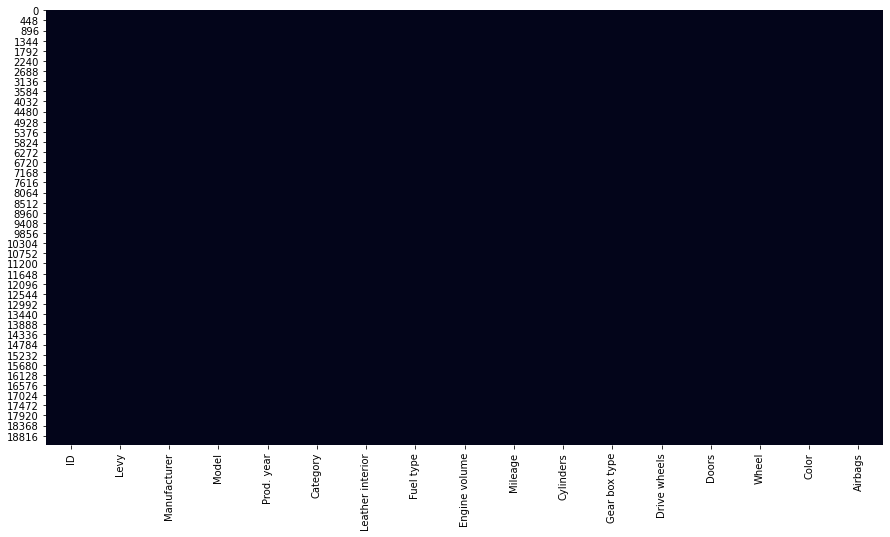

In [29]:
#Plotting missing values in the datsset using heatmap function of seaborn
sns.heatmap(df.isnull(),cbar=False)
plt.show()

Correlation:

1) The function 'corr' tells us about the correlation between two features.

2) The value of correlation lies between -1 to 1.

3) The value between -0.5 to 0.5 means low correlation.

4) The value >0.5 and <-0.5 means high correlation.

5) We drop the features with high correation to avoid multicollinearity, since it is one of the assumption of linear regression that the dataset should have no multicollinearity.

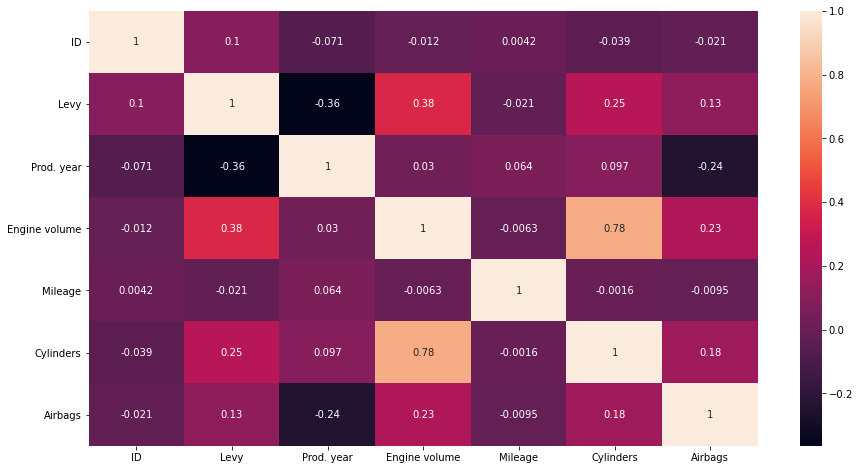

In [30]:
#Checking for correlation among the independent variables
sns.heatmap(df.corr(),cbar=True, annot=True)
plt.show()

We can see that 'Engine volume' is having high correlation(0.78) with 'Cylinders' column. We will drop the 'Cylinders' column to avoid multicollinearity.

In [31]:
# Droping the Cylinders column
df.drop(["Cylinders"],axis=1, inplace=True)

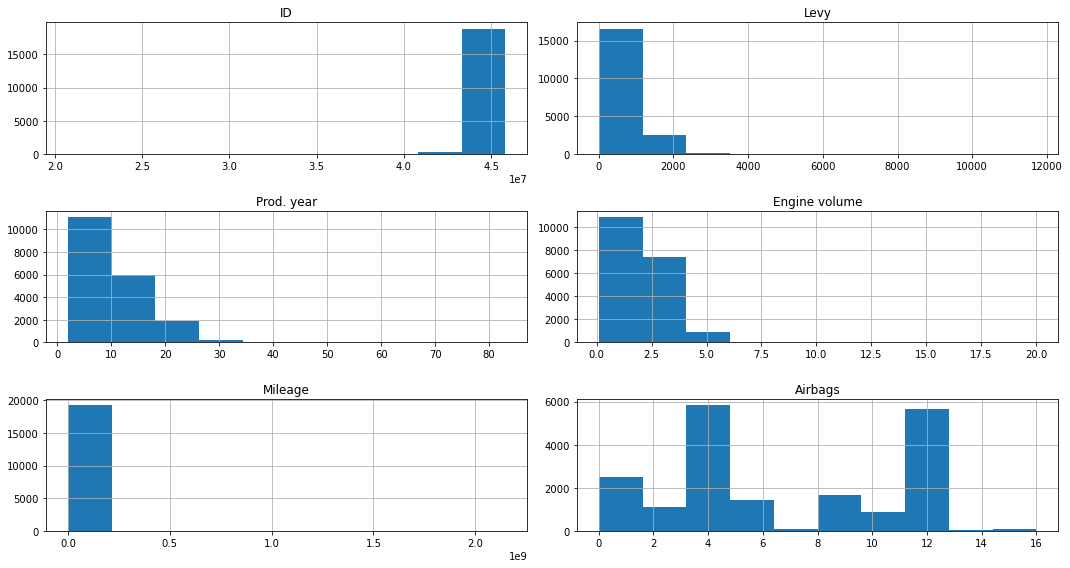

In [32]:
# To identify distribution and skewness by plotting histogram of all numeric variables
df.hist()
plt.tight_layout()
plt.show()

We can see that 'Prod. year','Levy' and 'Engine volume' columns are right skewed.

In [33]:
#Check the skewness values using the fuction skew()
print(f"The skewness values of the production year is:{df['Prod. year'].skew()}")
print(f"The skewness values of the Levy is:{df['Levy'].skew()}")
print(f"The skewness values of the Engine volume is:{df['Engine volume'].skew()}")


The skewness values of the production year is:2.0822607659292403
The skewness values of the Levy is:2.3762218952178955
The skewness values of the Engine volume is:2.2034800052642822


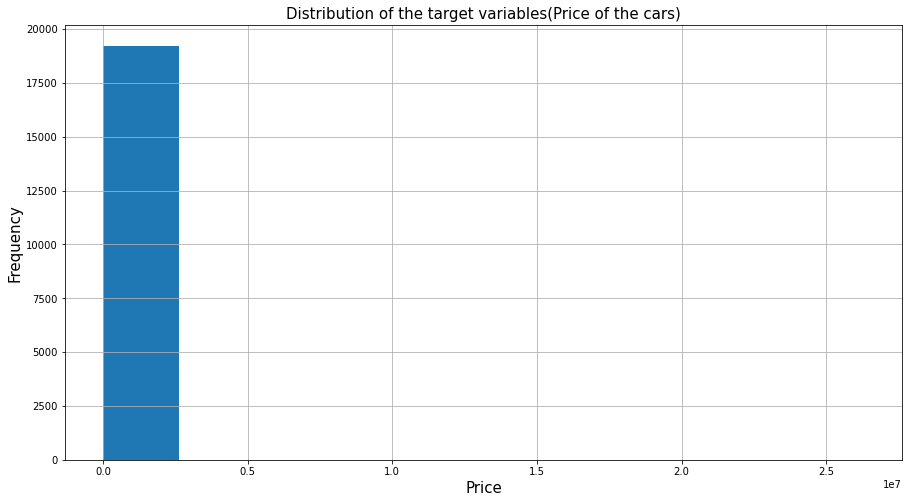

In [34]:
#Check the normality distribution of target variable
y.hist()


plt.title('Distribution of the target variables(Price of the cars)', fontsize = 15)
plt.xlabel('Price', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

In [35]:
#normalityt test using shapiro()
# the test returns the the test statistics and the p-value of the test
stat, p=shapiro(y)
print('Statistics=%.3f, p-value=%.3f' %(stat,p))

Statistics=0.013, p-value=0.000


In [36]:
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The dats is normally distributed(fail to reject H0)')
else:
    print('The dats is not normally distributed (reject H0)')


The dats is not normally distributed (reject H0)


In [37]:
#Checking the skewness value
print('The skewness value of the target variable is:',y.skew())

The skewness value of the target variable is: 136.47042654268714


In [38]:
# As from the shapiro test and the skewness value we can see that 'Price' column is highly positively skewed
# Hence,we normalize the column using log transformation
y = np.log(y)

In [39]:
#Rechecking the Skewness after the log transformation
print('The skewness of the dependent variable after log tranformation',y.skew())

The skewness of the dependent variable after log tranformation -1.391557339534271


Hence, we can see that the skewness of the dependent variable has considerably got reduced.

# 6.Prepare the data for the model building

We need to perform dummy encoding on our categorical variables before we proceed; since the model can understand only the numeric data.

In order to dummy encode, we do the following:

                1. Filter numerical and categorical variables<br>
                2. Dummy encode the catergorical variables<br>
                3. Concatenate numerical and dummy encoded categorical variables

In [40]:
# seperating the categorical and numerical data
categorical = df.select_dtypes(include = 'object')
numerical = df.select_dtypes(include = np.number)

In [41]:
categorical

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Doors,Wheel,Color
0,LEXUS,RX 450,Jeep,Yes,Hybrid,Automatic,4x4,04,Left wheel,Silver
1,CHEVROLET,Equinox,Jeep,No,Petrol,Tiptronic,4x4,04,Left wheel,Black
2,HONDA,FIT,Hatchback,No,Petrol,Variator,Front,04,Right-hand drive,Black
3,FORD,Escape,Jeep,Yes,Hybrid,Automatic,4x4,04,Left wheel,White
4,HONDA,FIT,Hatchback,Yes,Petrol,Automatic,Front,04,Left wheel,Silver
...,...,...,...,...,...,...,...,...,...,...
19232,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,Manual,Rear,02,Left wheel,Silver
19233,HYUNDAI,Sonata,Sedan,Yes,Petrol,Tiptronic,Front,04,Left wheel,Red
19234,HYUNDAI,Tucson,Jeep,Yes,Diesel,Automatic,Front,04,Left wheel,Grey
19235,CHEVROLET,Captiva,Jeep,Yes,Diesel,Automatic,Front,04,Left wheel,Black


In [42]:
# getting dummies for the categorical variables
dummies = pd.get_dummies(categorical, drop_first=True)
dummies

,Manufacturer_ALFA ROMEO,Manufacturer_ASTON MARTIN,Manufacturer_AUDI,Manufacturer_BENTLEY,Manufacturer_BMW,Manufacturer_BUICK,Manufacturer_CADILLAC,Manufacturer_CHEVROLET,Manufacturer_CHRYSLER,Manufacturer_CITROEN,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
19233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
19234,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
19235,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# creating the final dataset. Concatinate categorical and numerical dataset
df_final = pd.concat([numerical,dummies], axis =1)

In [44]:
df_final.shape

(19237, 1699)

Model building and testing steps:

Split the data into training and test set using train_test_split

Build model using sklearn.linear_model

Predict the values using test set

Compute accuracy measures

Tabulate the results

In [45]:
#Splitting the data into test and train
X = df_final
Y = y

# Splitting the data before building the model in order to train the model and later check its accuracy
# The argument "test_size" tells about the ratio of data, that needs to be kept for testing the model

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=10)

In [46]:
print(f'The shape of the X_train dats is : {X_train.shape}')
print(f'The shape of the X_test dats is : {X_test.shape}')
print(f'The shape of the Y_train dats is : {Y_train.shape}')
print(f'The shape of the Y_test dats is : {Y_test.shape}')

The shape of the X_train dats is : (13465, 1699)
The shape of the X_test dats is : (5772, 1699)
The shape of the Y_train dats is : (13465,)
The shape of the Y_test dats is : (5772,)


# 7.Model 1 (Linear Regression)

In [47]:
LR = LinearRegression()
model1 = LR.fit(X_train,Y_train)   #Fitting the model on the training data

In [48]:
#Predicting the output of teh test data
predicted = model1.predict(X_test)

In [49]:
# calculating the metrics root mean squared log error
RMSLE = np.sqrt(mean_squared_log_error(predicted,Y_test))
RMSE = rmse(predicted,Y_test)   #metrics root mean squared error
mae = mean_absolute_error(Y_test,predicted)

In [50]:
# create the result table for all accuracy scores
cols = ['Model','RMSE','RMSLE','Mean Absolute Error']
result_tabulation = pd.DataFrame(columns =cols)

linreg_full_model_withlog_metrices = pd.Series({'Model':"Linear Regression",
                                                'RMSE' : RMSE,
                                                'RMSLE' : RMSLE,
                                                'Mean Absolute Error' : mae
                                               })
result_tabulation = result_tabulation.append(linreg_full_model_withlog_metrices, ignore_index = True)
result_tabulation

,Model,RMSE,RMSLE,Mean Absolute Error
0,Linear Regression,1.324858,0.163939,0.925518


Feature Selection Techniques:

We need to select significant features to train the model.If there are lot of features it results in increasing the model complexity.

# 8.Model 2 (Ridge regressor using feature selection and hyperparameter tuning technique)

Steps used for model building:

In this model, linear regression from statsmodels has been used to find the probability values of all the features.All the significant features have been selected i.e. features having p-value less than 0.05.

Ridge regressor has been used to find the best parameters.These parameters have been used in the ridge regressor to predict the price of cars

In [51]:
#instantiating the ordinary least square model
model2 = sm.OLS(Y_train,X_train).fit()
model2.summary()                         #Display all the statistical summary of the medel

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     4.958
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        14:34:57   Log-Likelihood:                -22458.
No. Observations:               13465   AIC:                         4.762e+04
Df Residuals:                   12114   BIC:                         5.776e+04
Df Model:                        1350                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
ID                              1.606e-07   1.53e-08     10.493      0.000    1.31e-07    1.91e-07
Levy                              -0.0002   3.13e-05     -7.516      0.000      -0.000      -0.000
Prod. year                        -0.0845      0.004    -20.484      0.000      -0.093      -0.076
Engine volume                     -0.0744      0.042     -1.769      0.077      -0.157       0.008
Mileage                        -4.873e-10   2.32e-10     -2.098      0.036   -9.43e-10    -3.2e-11
Airbags                           -0.0475      0.004    -12.007      0.000      -0.055      -0.040
Manufacturer_ALFA ROMEO            3.0359      0.849      3.577      0.000       1.372       4.700
Manufacturer_ASTON MARTIN      -8.065e-07   8.46e-07     -0.954      0.340   -2.46e-06    8.51e-07
Manufacturer_AUDI                  4.3466      0.816      5.329      0.000       2.748       5.945
Manufacturer_BENTLEY               4.2194      0.803      5.254      0.000       2.645       5.793
Manufacturer_BMW                   4.8489      0.970      4.998      0.000       2.947       6.751
Manufacturer_BUICK                 7.4881      1.728      4.334      0.000       4.101      10.875
Manufacturer_CADILLAC              4.3336      0.826      5.246      0.000       2.714       5.953
Manufacturer_CHEVROLET             4.1322      0.793      5.214      0.000       2.579       5.686
Manufacturer_CHRYSLER              4.8657      1.134      4.290      0.000       2.643       7.089
Manufacturer_CITROEN               4.0047      0.834      4.804      0.000       2.371       5.639
Manufacturer_DAEWOO                3.7057      0.840      4.409      0.000       2.058       5.353
Manufacturer_DAIHATSU              2.8951      0.825      3.510      0.000       1.278       4.512
Manufacturer_DODGE                 4.0278      0.818      4.922      0.000       2.424       5.632
Manufacturer_FERRARI               3.2744      0.801      4.089      0.000       1.705       4.844
Manufacturer_FIAT                  3.9768      0.796      4.999      0.000       2.417       5.536
Manufacturer_FORD                  4.4097      0.807      5.466      0.000       2.828       5.991
Manufacturer_GAZ                   4.5106      0.852      5.293      0.000       2.840       6.181
Manufacturer_GMC                   2.7899      0.754      3.702      0.000       1.313       4.267
Manufacturer_GREATWALL             1.6714      0.787      2.124      0.034       0.129       3.214
Manufacturer_HAVAL             -1.173e-06   9.45e-07     -1.242      0.214   -3.02e-06    6.79e-07
Manufacturer_HONDA                 4.4231      0.817      5.416      0.000       2.822       6.024
Manufacturer_HUMMER                4.5262      0.851      5.318      0.000       2.858       6.194
Manufacturer_H

In [52]:
#all the independent features having p-values less than 0.05 has been selected
X1 = df_final[['ID', 'Levy', 'Prod. year','Mileage', 'Airbags','Manufacturer_ALFA ROMEO','Manufacturer_AUDI','Manufacturer_BENTLEY',
             'Manufacturer_BMW','Manufacturer_BUICK','Manufacturer_CADILLAC','Manufacturer_CHEVROLET','Manufacturer_CHRYSLER',
             'Manufacturer_CITROEN','Manufacturer_DAEWOO','Manufacturer_DAIHATSU','Manufacturer_DODGE','Manufacturer_FERRARI',
             'Manufacturer_FIAT','Manufacturer_FORD','Manufacturer_GAZ','Manufacturer_GMC','Manufacturer_GREATWALL','Manufacturer_HONDA',
             'Manufacturer_HUMMER','Manufacturer_HYUNDAI','Manufacturer_INFINITI','Manufacturer_ISUZU','Manufacturer_JAGUAR','Manufacturer_JEEP',
             'Manufacturer_KIA','Manufacturer_LANCIA','Manufacturer_LAND ROVER','Manufacturer_LEXUS','Manufacturer_LINCOLN','Manufacturer_MASERATI','Manufacturer_MAZDA','Manufacturer_MERCEDES-BENZ','Manufacturer_MERCURY','Manufacturer_MINI',
             'Manufacturer_MITSUBISHI','Manufacturer_MOSKVICH','Manufacturer_NISSAN','Manufacturer_OPEL','Manufacturer_PEUGEOT','Manufacturer_PONTIAC',
             'Manufacturer_PORSCHE','Manufacturer_RENAULT','Manufacturer_ROLLS-ROYCE','Manufacturer_ROVER','Manufacturer_SAAB','Manufacturer_SATURN','Manufacturer_SCION',
             'Manufacturer_SEAT','Manufacturer_SKODA','Manufacturer_SSANGYONG','Manufacturer_SUBARU','Manufacturer_SUZUKI','Manufacturer_TESLA','Manufacturer_TOYOTA','Manufacturer_UAZ','Manufacturer_VAZ',
             'Manufacturer_VOLKSWAGEN','Manufacturer_VOLVO','Manufacturer_ZAZ','Manufacturer_სხვა','Model_1500','Model_1000','Model_20','Model_200',
             'Model_230 W153','Model_3110','Model_400','Model_535 M','Model_540 I','Model_969 luaz','Model_A 160','Model_A 190',
             'Model_A4','Model_A6','Model_A7','Model_A7 Prestige','Model_Acadia','Model_Accent','Model_Accord','Model_Actyon',
             'Model_Avalon','Model_Avella','Model_Avenger','Model_B9 Tribeca','Model_C 220','Model_C 350','Model_C 43 AMG',
             'Model_C30','Model_CC','Model_CHR','Model_CLK 230','Model_CRX','Model_CT 200h','Model_CX-7','Model_CX-9','Model_Camaro',
             'Model_Camry','Model_Captiva','Model_Century','Model_Colorado','Model_Compass','Model_Cooper S Cabrio','Model_Corolla',
             'Model_Corolla 140','Model_Delica','Model_E 300','Model_E 350','Model_E 500 AVG','Model_ES 350','Model_Escape','Model_Eunos 500',
             'Model_Explorer','Model_F-type R','Model_F150','Model_F50','Model_FIT','Model_Fusion','Model_G 55 AMG','Model_G 63 AMG',
             'Model_G6','Model_GLA 250','Model_GLE 450','Model_GX 460','Model_GX 470','Model_Genesis','Model_Ghibli','Model_Grand Cherokee',
             'Model_H1','Model_H2','Model_HS 250h','Model_IS 200','Model_IX35','Model_IX35 2.0','Model_Insight','Model_Jetta','Model_Juke',
             'Model_Korando','Model_Lacetti','Model_Land Cruiser','Model_Land Cruiser Prado','Model_MDX','Model_ML 350','Model_Musa','Model_NX 200',
             'Model_Mustang','Model_Navigator','Model_Note','Model_Orlando','Model_Pajero','Model_Phantom','Model_Prius','Model_Q7','Model_RDX',
             'Model_REXTON','Model_RIO','Model_RX 350','Model_RX 400 HYBRID','Model_RX 400 RESTAILING','Model_RX 450','Model_SX4','Model_Sai',
             'Model_Santa FE','Model_Serena Serea','Model_Smart','Model_Sprinter VIP CLASS','Model_Sprinter სატვირთო','Model_TSX',
             'Model_Terios','Model_Tiida','Model_Town Car','Model_Tundra','Model_VOXY','Model_Vaneo','Model_VehiCross','Model_Versa',
             'Model_Volt','Model_Vue','Model_Wrangler','Model_X-Trail','Model_XF','Model_XV','Model_xD','Leather interior_Yes','Fuel type_Petrol',
             'Fuel type_Plug-in Hybrid','Gear box type_Manual','Gear box type_Tiptronic','Gear box type_Tiptronic','Gear box type_Variator',
             'Drive wheels_Front','Wheel_Right-hand drive','Color_Purple']]

In [53]:
# splitting the dataset into train and test data
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y,test_size=0.2,random_state=30)

In [54]:
# instantiating the ridge regressor
ridge = Ridge()

parameters={'alpha':[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100],
            'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
            'normalize':[True,False]
            }
                          

In [ ]:
#using 'GridSearchCV' to find the best parameters
ridge_regressor=GridSearchCV(ridge,parameters,scoring='r2',cv=5)
ridge_regressor.fit(X1_train,Y1_train)
print(ridge_regressor.best_params)  # Shows the best value of alpha that fits model 

In [ ]:
#instantiating the ridge regressor with best parameters
model2=Ridge(alpha=1, normalize=False, solver='auto')
model2.fit(X1_train,Y1_train)

In [ ]:
#predict the price of cars using the 'predict()'
p=model2.predict(X1_test)

rmse=rmse(p,y1_test)
rmsle=np.sqrt(mean_squared_log_error(p,y1_test))
mae=mean_absolute_error(p,y1_test)

In [ ]:
linreg_model2 = pd.Series({'Model': "Ridge Regression with feature selection using p-value",
                     'RMSE':rmse,
                     'RMSLE': rmsle,
                     'Mean Absolute Error': mae     
                   })
result_tabulation = result_tabulation.append(linreg_model2, ignore_index = True)
result_tabulation

# 9.Model 3(Linear Regression with feature selection technique)

In [ ]:
#instantiating randomforest
rf=RandomForestRegressor()
rf.fit(X_train,y_train)   #fitting the training data

In [ ]:
#Creating a panda series containing the features and their importances
best_features=pd.Series(rf.feature_importances_,index=X_train.columns)
best_features.nlargest(30).index   #selecting the top 30 features

In [ ]:
# Creating a dataframe containing the most significant independent features
X3=df_final[['Airbags', 'ID', 'Mileage', 'Prod. year', 'Gear box type_Tiptronic',
       'Levy', 'Engine volume', 'Leather interior_Yes', 'Model_FIT',
       'Fuel type_Hybrid', 'Category_Jeep', 'Color_White',
       'Drive wheels_Front', 'Color_Grey', 'Color_Black', 'Color_Silver',
       'Manufacturer_TOYOTA', 'Manufacturer_LEXUS', 'Category_Sedan',
       'Fuel type_Petrol', 'Model_Prius', 'Drive wheels_Rear',
       'Fuel type_Diesel', 'Color_Blue', 'Manufacturer_MERCEDES-BENZ',
       'Category_Hatchback', 'Gear box type_Variator', 'Model_Note',
       'Model_Highlander', 'Model_Prius C']]

In [ ]:
# splitting the data for training and testing the data
X3_train,X3_test,y3_train,y3_test=train_test_split(X3,Y,test_size=0.3,random_state=30)
model3=LinearRegression()
model3.fit(X3_train,y3_train)

In [ ]:
#predict the price of cars using the 'predict()'
p1=model3.predict(X3_test)

rms=rmse(p1,y3_test)
rmsle=np.sqrt(mean_squared_log_error(p1,y3_test))
mae=mean_absolute_error(p1,y3_test)

In [ ]:
linreg_model3 = pd.Series({'Model': "Linear regression with feature selection",
                     'RMSE':'-',
                     'RMSLE': rmsle,
                     'Mean Absolute Error': mae     
                   })
result_tabulation = result_tabulation.append(linreg_model3, ignore_index = True)
result_tabulation

# 10.Model 4(Ridge regression with hyperparameter tuning and feature selection)

In [ ]:
# instantiating the ridge regressor
ridge=Ridge()

parameters={'alpha':[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100],
            'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
            'normalize':[True,False]
            }

ridge_regressor=GridSearchCV(ridge,parameters,scoring='r2',cv=5)
ridge_regressor.fit(X3_train,y3_train)
print(ridge_regressor.best_params_)

In [ ]:
model4=Ridge(alpha=10, normalize=False, solver='svd')
model4.fit(X3_train,y3_train)
p2=model4.predict(X3_test)

rmse=rmse(p2,y3_test)
rmsle=np.sqrt(mean_squared_log_error(p2,y3_test))
mae=mean_absolute_error(p2,y3_test)

In [ ]:
linreg_model4 = pd.Series({'Model': "Ridge Regression with hyperparameter tuning and feature selection",
                     'RMSE':'-',
                     'RMSLE': rmsle,
                     'Mean Absolute Error': mae     
                   })
result_tabulation = result_tabulation.append(linreg_model4, ignore_index = True)
result_tabulation

# 11.Conclusion

Out of the four models built, metrics of Linear regression looks better than the other three models as the losses are less. But as per the test data we should consider the second model i.e. ridge regression with hyperparameter tuning and feature selection as it will reduce the variance.Hece model 2 will work better on testing data.